# Статистика, прикладной поток
## Практическое задание 2

В данном задании вы визуализируйте некоторые свойства оценок (несмещенность, состоятельность, асимптотическая нормальность), посмотрите на свойства оценки максимального правдоподобия, а также сравните некоторые оценки при помощи построения функций риска.

**Правила:**

* Дедлайн **13 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  10 баллов
* Задача 2 -  5 баллов
* Задача 3 -  5 баллов
* Задача 4 -  5 баллов
* Задача 5 -  5 баллов
* Задача 6 -  20 баллов

Все задачи имеют тип **O2**. Подробнее см. в правилах выставления оценки.

In [36]:
import numpy as np
import scipy.stats as sps
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

**Задача 1.** В этой задаче предлагается изучить *свойство несмещённости*.

_____________________
**1.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** 

Для начала выпишем используемые факты: 
* Плотность порядковой статистики:

$ p_{X_{(k)}} = C_n^k\cdot k \cdot p_{X}(x) \cdot F_X^{k-1}(x) \cdot (1-F_{X}(x))^{n-k}$

* Математическое ожидание n-ой порядковой статистики из выборки из распределения $U[0, \theta]$:

$\mathsf{E}X_{(n)}
= \int\limits_0^{\theta}C_n^k \cdot k \cdot (\frac{x}{\theta})^n\cdot(1-\frac{x}{\theta})^{n-n}dx
= \frac{n}{\theta^n} \cdot \int\limits_0^{\theta} x^k dx
= \frac{k}{n+1}\theta$


Проверим оценки на несмещенность, вычислив мат. ожидание:
* $\mathsf{E}_{\theta}X_{(n)} = \frac{n}{n + 1}\theta$ --- смещённая оценка
* $\mathsf{E}_{\theta}(\frac{n+1}{n}X_{(n)}) = \frac{n+1}{n}\mathsf{E}_{\theta}X_{(n)} = \theta$ --- несмещённая оценка
* $\mathsf{E}_{\theta}2\overline{X} = 2 \mathsf{E}_{\theta}\overline{X} = 2 \cdot \frac{\theta}{2} = \theta$ --- несмещённая оценка


Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$:

Вычислите $k = 500$ независимых оценок $\widehat{\theta_1}, ... , \widehat{\theta_k}$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $U[0, 1]$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta_1}, $y$), ... , (\widehat{\theta_k}, y)$ и среднее оценок $(\overline{\theta}, y)$, где $y$ -- произвольные различные (например 0, 1, 2) координаты для трёх различных типов оценок.

Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение трёх типов оценок и их среднее.

Копипаста неприемлема, используйте циклы и функции.

Используйте данный шаблон для визуализации значений:

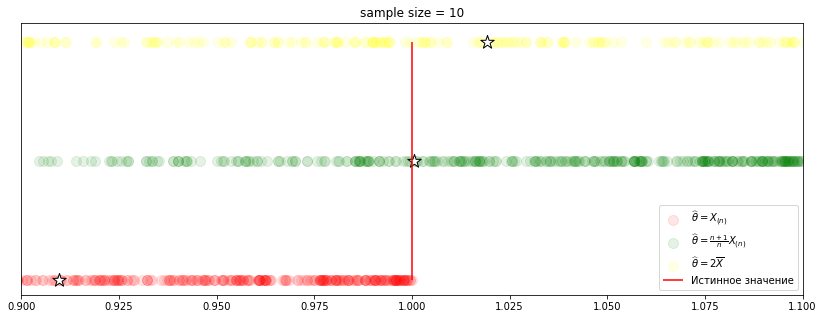

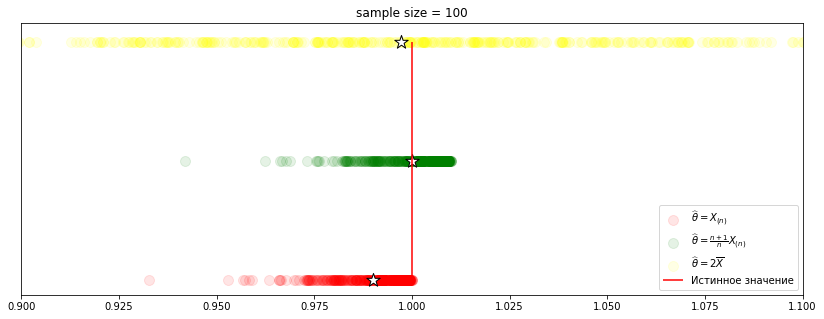

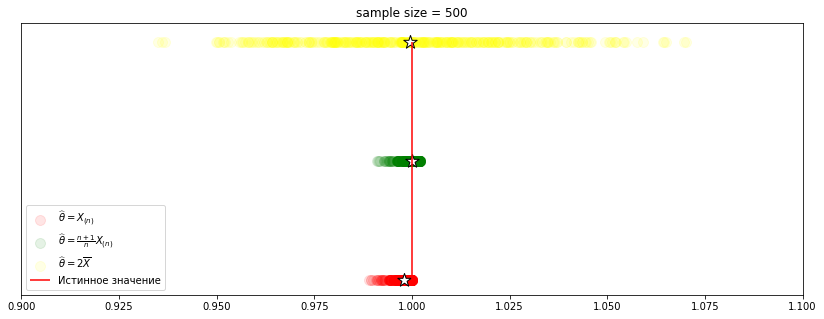

In [37]:
def ScatterExperiment(n, X_sample, Estimator, colors, labels):    
    """ Обобщённая функция, которая рисует оценки 
    по выборке X_sample размера n с помощью функции Estimator
    двух аргументов (выборка, номер оценкци)
    """
    plt.figure(figsize=(14, 5))
    for y in range(len(colors)):
        theta = Estimator(X, y)
        plt.scatter(theta , np.zeros(k) + y,  label=labels[y],
            alpha=0.1, s=100, color=colors[y])
        plt.scatter(theta.mean(), y, marker='*', s=200, 
            color='w', edgecolors='black')
    
    plt.vlines(1, 0, 2, color='r', label="Истинное значение")
    
    plt.xlim(1 - 0.1, 1 + 0.1)
    plt.title('sample size = %d' % n)
    plt.yticks([])
    plt.legend()
    plt.show()


def Theta(X_sample, case):
    n = X_sample.shape[1]
    if case == 0:
        return X_sample.max(axis=1)
    if case == 1:
        return X_sample.max(axis=1) * 1. * (n+1) / n
    return 2 * X_sample.mean(axis=1)

k = 400
n_range = [10, 100, 500]
colors = ['red', 'green', 'yellow']
labels = [r'$ \widehat{\theta} = X_{(n)}$',
          r'$ \widehat{\theta} = \frac{n+1}{n} X_{(n)}$', 
          r'$ \widehat{\theta} = 2\overline{X}$']
for n in n_range:
    X = sps.uniform.rvs(size=(k, n))
    
    ScatterExperiment(n, X, Theta, colors, labels)

__________________
**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для трёх типов оценок. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

**Ответ:** Все три оценки являются асимптотически несмещёнными. Так как оценки $\frac{n+1}{n}X_{(n)}$ и $2 \overline{X}$ просто несмещённые, а $\lim\limits_{n \rightarrow +\infty} X_{(n)} = \lim\limits_{n \rightarrow +\infty} \frac{n}{n+1}\theta = \theta$

Изучим это поведение:

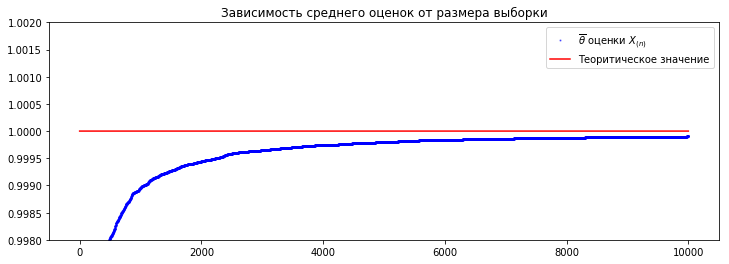

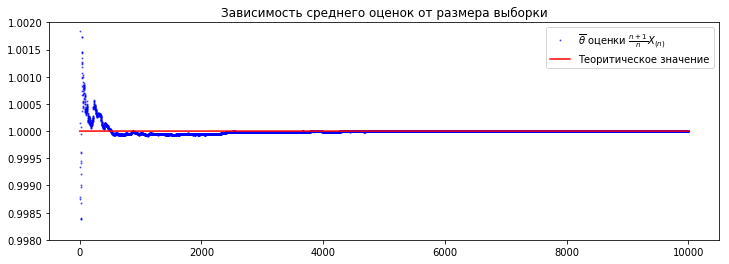

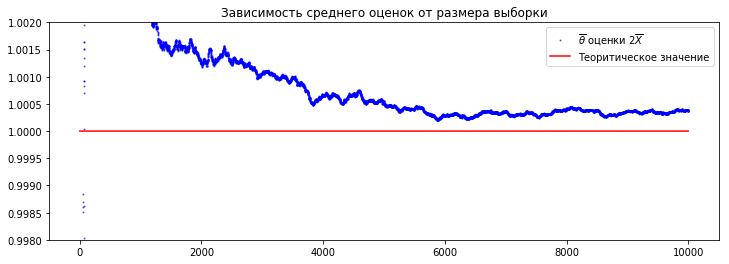

In [38]:
def DrowDependencies(X, EstimatorMean, labels, theoretical_value=1):
    """ Рисуем по одному графику для каждой из оценок
    по двум параметрам:
    k - количество независимых выборок
    n - Максимальный размер выборок
    """
    
    for i in range(len(labels)):
        plt.figure(figsize=(12, 4))
        plt.plot(EstimatorMean(X, i), 'bs', ms=1, label=labels[i], alpha=0.5)
        plt.plot(np.ones(n) * theoretical_value, color='r', label=r"Теоритическое значение", alpha=1)
        plt.ylim(theoretical_value - 0.002, theoretical_value + 0.002)
        
        plt.title("Зависимость среднего оценок от размера выборки")
        plt.legend()
        plt.show()

def MeanTheta(X_sample, case):
    Y = np.maximum.accumulate(X_sample, axis=1)  # префиксные максимумы
    n = X_sample.shape[1]
    seq = np.arange(1, n + 1)
    
    if case == 0:
        return Y.mean(axis=0)
    if case == 1:
        
        return (Y * (seq+1) / seq).mean(axis=0)
    return (2. * X_sample.cumsum(axis=1) / np.arange(1, n + 1)).mean(axis=0)
        
    

k = 400
n = 10000
X = sps.uniform.rvs(size=(k, n))
labels = [r'$\overline{\theta}$ оценки $X_{(n)}$',
          r'$\overline{\theta}$ оценки $\frac{n+1}{n} X_{(n)}$',
          r'$\overline{\theta}$ оценки $2\overline{X}$']
DrowDependencies(X, MeanTheta, labels)

_______________________________________________________
**3.** Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$. Какие из этих оценок являются несмещенными?

*Напоминание:* $S^2 = \frac{1}{n} \sum\limits_{i = 1}^{n} (X_i - \overline{X})^2 = \overline{X^2} - \overline{X}^2$

**Ответ:** 
* $\mathsf{E}S^2
 = \mathsf{E}(\overline{X^2} - \mathsf{E}\overline{X}^2)
 = \mathsf{E}X_1^2 - \frac{1}{n^2}\mathsf{E} (\sum\limits_{i=1}^n X_i) ^ 2
 = \mathsf{E}X_1^2 - \frac{1}{n}\mathsf{E}(X_1^2) - \frac{n-1}{n}(\mathsf{E}X_1)^2
 = \frac{n-1}{n}\sigma^2$ -- получили смещённую оценку
* $\mathsf{E}(\frac{n}{n-1}S^2) 
 = \frac{n}{n-1}\mathsf{E}(S^2) 
 = \sigma^2$ -- несмещённая оценка

Для данной модели повторите действия из первых двух частей.

* Повторим первую часть с изображением оценок на $\sigma^2$

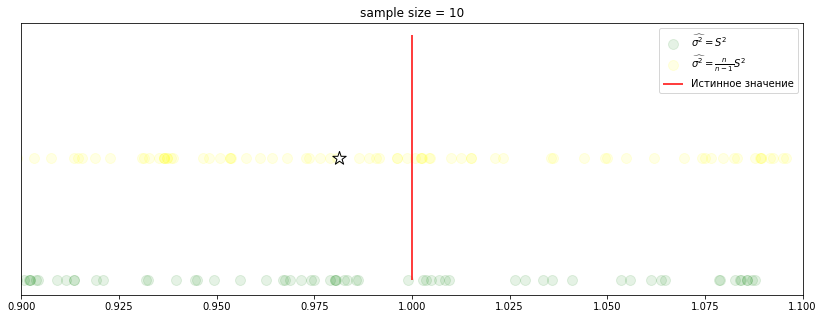

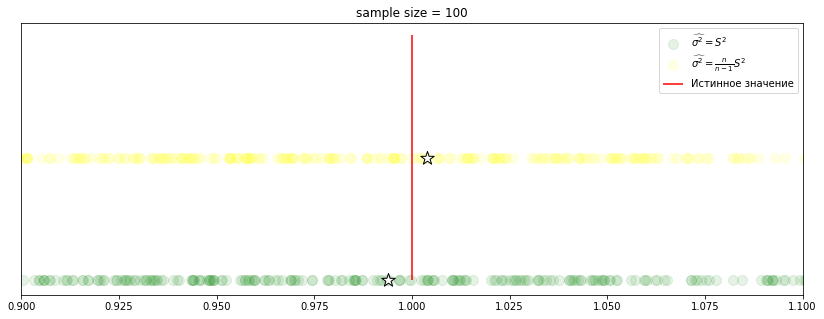

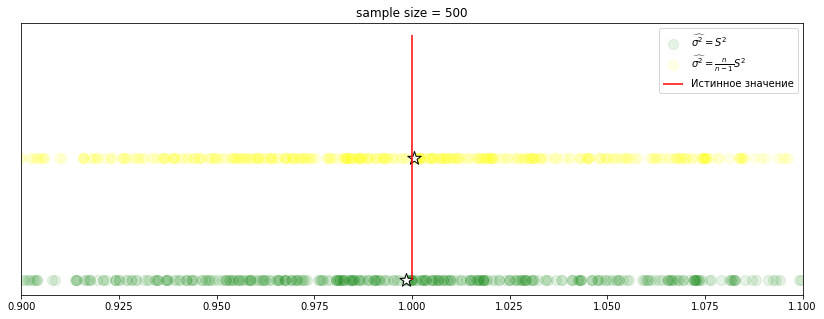

In [39]:
def Sigma(X_sample, case):
    k = X_sample.shape[0]
    n = X_sample.shape[1]
    
    S2 = (X_sample ** 2).mean(axis=1)
    S2 -= X_sample.mean(axis=1) ** 2
    
    if case == 0:
        return S2
    
    return S2 * n / (n-1)


k = 400
n_range = [10, 100, 500]
colors = ['green', 'yellow']
labels = [r'$ \widehat{\sigma^2} = S^2$',
          r'$ \widehat{\sigma^2} = \frac{n}{n-1} S^2$']
for n in n_range:
    X = sps.norm.rvs(size=(k, n))
    
    ScatterExperiment(n, X, Sigma, colors, labels)

* Повторим вторую часть с изображением зависимости $\overline{\sigma^2}$ 
от размера выборки n для каждой оценки:

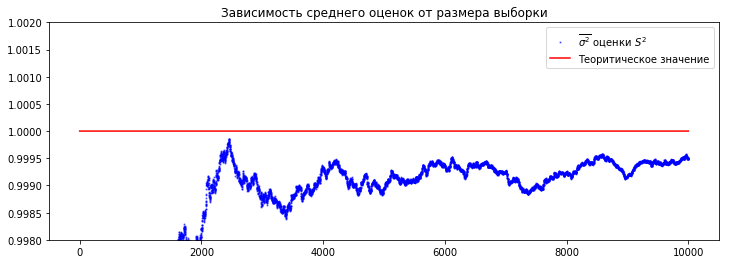

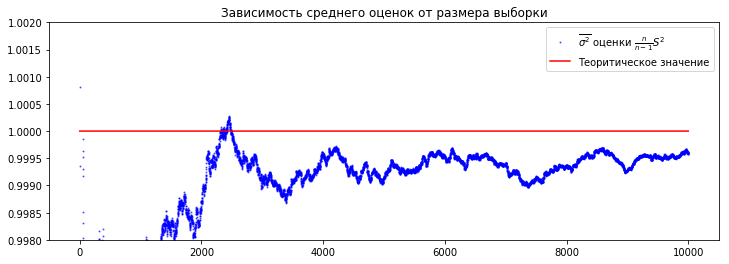

In [40]:
def MeanSigma(X_sample, case):
    n = X_sample.shape[1]
    seq = np.arange(1, n + 1)
    S2 = (X_sample ** 2).cumsum(axis=1) / seq
    S2 = S2 - (X_sample.cumsum(axis=1) / seq) ** 2
    
    if case == 0:
        return S2.mean(axis=0)
    
    d = seq - 1
    d[0] = 1
    return (S2 * seq / d).mean(axis=0)
        
    

k = 400
n = 10000
X = sps.norm.rvs(size=(k, n))
labels = [r'$\overline{\sigma^2}$ оценки $S^2$',
          r'$\overline{\sigma^2}$ оценки $\frac{n}{n-1} S^2$']
DrowDependencies(X, MeanSigma, labels)

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** Свойство несмещённости такое свойство, которое показывает, что в среднем по всем выборкам, наша оценка правильно оценивает параметр тетта. По построенным графикам можно сделать выбор, что свойство несмещённости лучше проявляется при больших размерах выборки и среднее устремляется к истинному значению. 

Потому что физики. Они любят подгонять значения к более удобным, вот и дописывают -1 в знаменатель...
Но на самом деле это связано с тем, что в большенстве случаев выборка экспериментов небольшая и это делается с целью уменьшить погрешность.

__________________

**Задача 2.** В этой задаче нужно визуализировать *свойство состоятельности*.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, \theta)$. Из домашнего задания известно, что оценки $\theta^* = 2\overline{X}, \widehat{\theta} = X_{(n)}$ являются состоятельными оценками $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них указанные выше оценки параметра $\theta$ в зависимости от размера выборки и визуализировав их состоятельность.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$, $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [41]:
k = 300
n = 500
X = sps.uniform.rvs(size=(k, n))
seq = np.arange(1, n + 1)

theta1 = 2 * X.cumsum(axis=1) / seq
theta2 = np.maximum.accumulate(X, axis=1)

Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

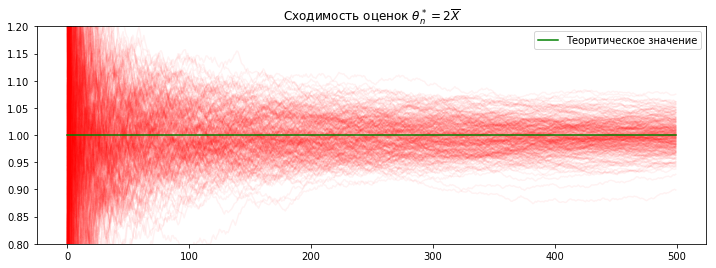

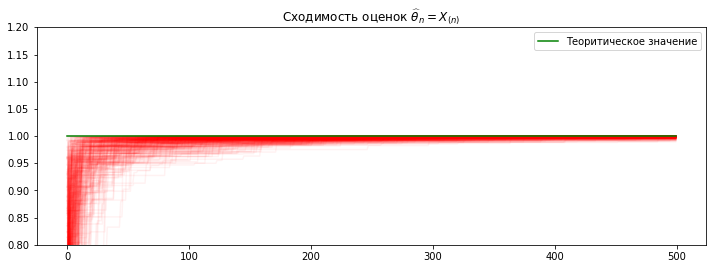

In [42]:
def DrowEstimator(Estimator, title):
    theoretical_value = 1
    plt.figure(figsize=(12, 4))
    plt.ylim(theoretical_value-0.2, theoretical_value+0.2)
    
    plt.plot(Estimator.T, color='r', alpha=0.05)
    
    plt.plot(np.ones(n) * theoretical_value, color='g', label=r"Теоритическое значение", alpha=1)
    plt.title(title)
    plt.legend()
    plt.show()


DrowEstimator(theta1, r'Cходимость оценок $\theta^*_{n} = 2\overline{X}$')
DrowEstimator(theta2, r'Cходимость оценок $\widehat{\theta}_n = X_{(n)}$' )

Сделайте вывод о смысле закона больших чисел. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод: ** Из Закона Больших чисел можно сделать вывод, что чем больше выборка случайных, одинаково
распределенных величин, тем ближи их среднее значение к математическому ожиданию этого
распределения. Если обратиться к графикам, то можно заметить, что по мере увеличения выбоки, оценка $\theta_n^* = 2 \overline(X)$ сходится к удвоенному среднему значению, т.е. к единице.

__________________
**Задача 3.** В этой задаче нужно визуализировать *свойство асимптотической нормальности*.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\theta^* = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них посчитайте оценки  $\theta^*_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \theta^*_{jn} - \theta \right)$, где $\theta = 1$.

In [43]:
k = 300
n = 500
seq = np.arange(1, n + 1)
theoretical_theta = 1

X = sps.uniform.rvs(size=(k, n))
theta = 2 * X.cumsum(axis=1) / seq
Z = (theta - theoretical_theta) * (seq ** (.5))

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

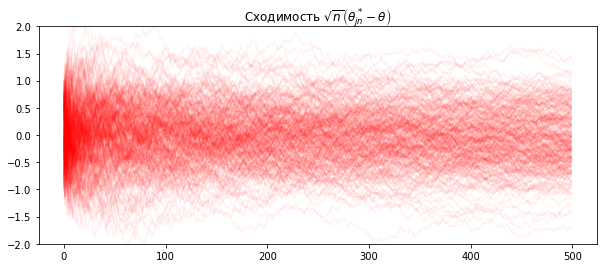

In [44]:
plt.figure(figsize=(10, 4))
plt.ylim(-2, 2)

plt.plot(Z.T, color='r', alpha=0.05)
        
plt.title(r'Сходимость $ \sqrt{n} \left( \theta^*_{jn} - \theta \right)$')
plt.show()

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте гистограмму и график плотности распределения $\mathcal{N}(0, \frac{1}{3})$.  Не забудьте сделать легенду.

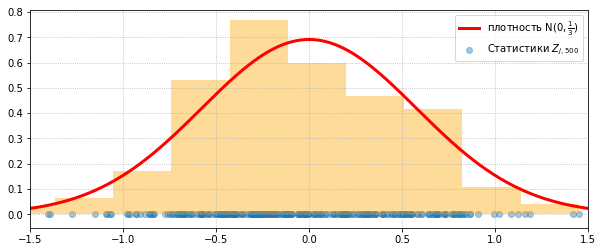

In [45]:
sample = Z[:,-1]
xmin, xmax = -1.5, 1.5
grid = np.linspace(xmin, xmax, 600)
plt.figure(figsize=(10, 4))
plt.xlim(xmin, xmax)
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(k), alpha=0.4, label=r'Статистики $Z_{j, 500}$')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=10, normed=True, alpha=0.4, color='orange')
# рисуем график плотности
plt.plot(grid, 
         sps.norm(0, 1./np.sqrt(3)).pdf(grid),
         color='red', lw=3, label='плотность $\mathsf{N}(0, \\frac{1}{3})$')
plt.legend()
plt.grid(ls=':')
plt.show()

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Ответ:** Можно заметить, что наша оценка не стремитсья к константе, как это было, например, в предыдущем задании, а сосредоточена у прямой $y=\theta$, причем с плотностью нормального стандартого распределения. И что дисперсия уменьшается с ростом n. Что также подтверждается построенной гистограммой. 

__________________
**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$.  Вам нужно убедиться в этом, сгенерировав множество выборок, посчитав по каждой из них оценку $X_{(n)}$ параметра $\theta$ в зависимости от размера выборки и визуализировав рассматриваемое свойство.

Сгенерируйте множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br>
По каждой из них посчитайте оценки  $\widehat{\theta}_{jn} = \max(X^j_1, \dots, X^j_n)$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $T_{jn} = n \left( \theta - \widehat{\theta}_{jn} \right)$, где $\theta = 1$.

In [46]:
k = 300
n = 500
theoretical_theta = 1
X = sps.uniform.rvs(size=(k, n))
seq = np.arange(1, n + 1)

theta = np.maximum.accumulate(X, axis=1)
T = seq * (theoretical_theta - theta)

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Все кривые должны быть нарисованы *одним и тем же цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

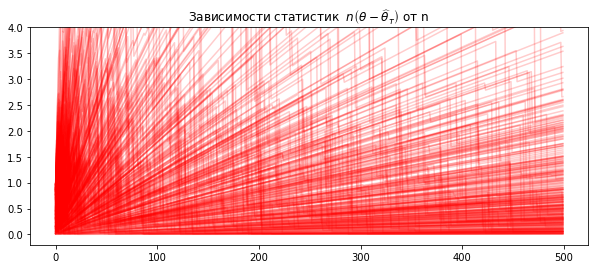

In [47]:
plt.figure(figsize=(10, 4))
plt.ylim(-0.2, 4)

plt.plot(T.T, color='r', alpha=0.2)
        
plt.title(r'Зависимости статистик  $n \left( \theta - \widehat{\theta}_{т} \right)$ от n')
plt.show()

**Ответ:** Можно заметить, что  они не сходятся к константе, а постепенно заполняют плотность экспоненциального распределения. И при увеличении $n$ оценка $\widehat{\theta}$ сходится к $\theta$ со скоростью в $n$ раз меньше, чем сходимость экспоненциального к нулю.

Для $n=500$ по выборке $T_{1,500}, ..., T_{300,500}$ постройте гистограмму и график плотности распределения $Exp(1)$.  Не забудьте сделать легенду.

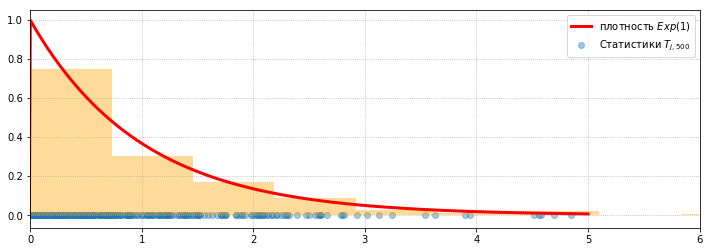

In [48]:
sample = T[:,-1]
xmin, xmax = -.1, 5
grid = np.linspace(xmin, xmax, 600)
plt.figure(figsize=(12, 4))

plt.scatter(sample, np.zeros(k), alpha=0.4, label=r'Статистики $T_{j, 500}$')
plt.hist(sample, bins=10, normed=True, alpha=0.4, color='orange')
plt.plot(grid, 
         sps.expon.pdf(grid),
         color='red', lw=3, label='плотность $Exp(1)$')
plt.legend()
plt.grid(ls=':')
plt.xlim((0, 6))
plt.show()

Хорошо ли гистограмма приближает плотность распределения $Exp(1)$? Подтверждают ли проведенные эксперименты свойство $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$? Что можно сказать в сравнении с оценкой, рассмотренной в предыдущей задаче?

**Вывод: ** Гистограмма явно приближает плотность распределения $Exp(1)$, что подтверждается сходимостью по распределению. Можно сказать, что оценка $X_{(n)}$ стримится к $\theta$ со скоростью стремления экспоненциального к нулю поделённого на $n$, а в предыдущей задаче со скоростью уменьшения дисперсии, что действительно ниже.

__________________
**Задача 5.** Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [49]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    """
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)
        
        plt.subplot(1, 3, i+1)
        plt.xlim(grid.min(), grid.max())
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

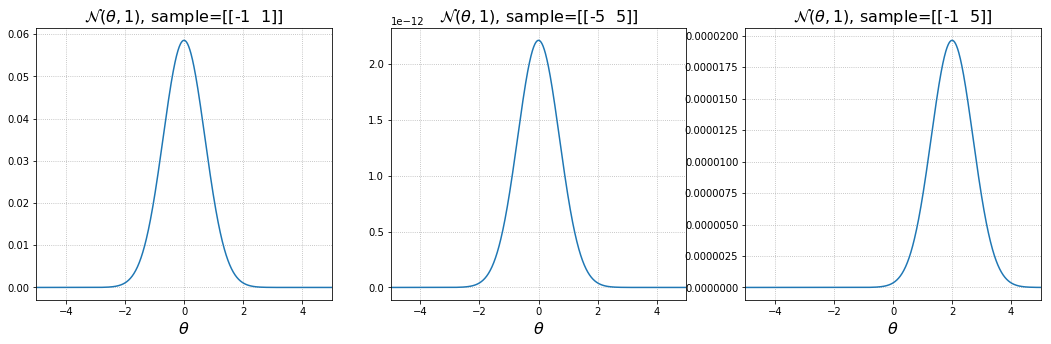

In [50]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

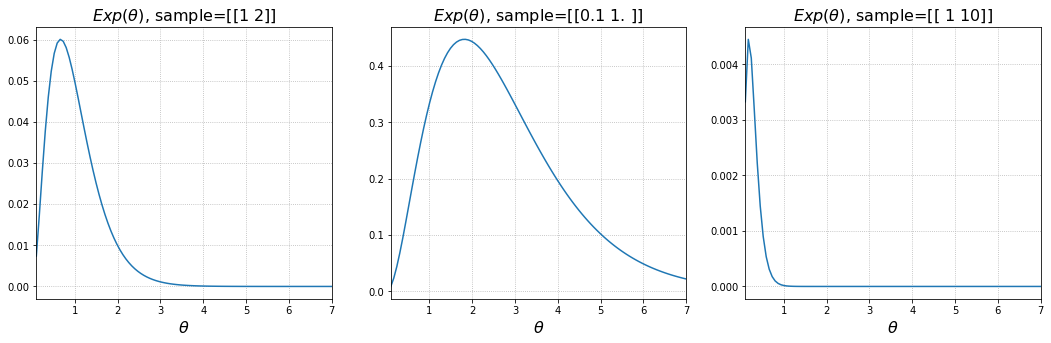

In [51]:
grid = np.linspace(0.1, 7, 100).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1 / grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

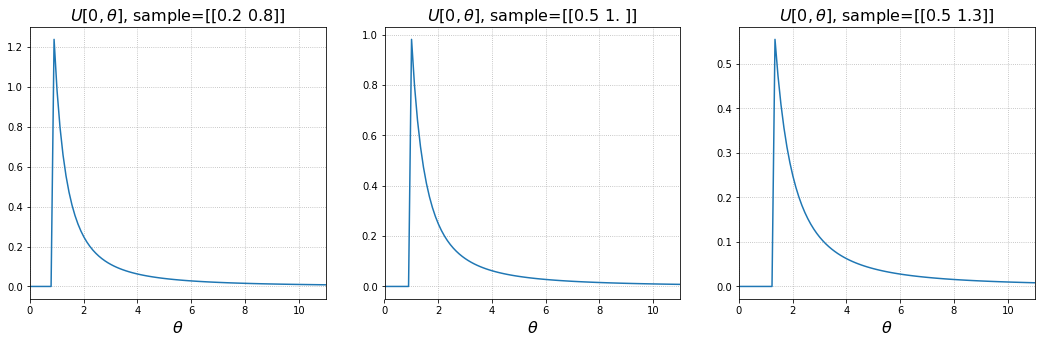

In [52]:
grid = np.linspace(0.01, 11, 100).reshape((-1, 1))
draw_likelihood(sps.uniform(scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

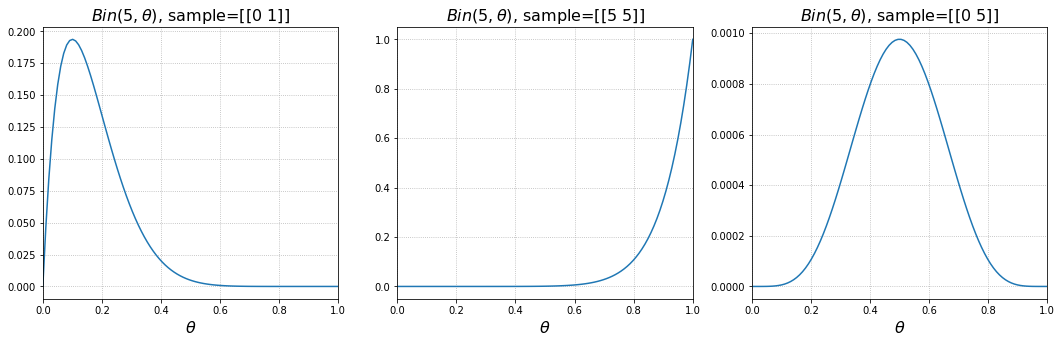

In [53]:
grid = np.linspace(0, 1, 100).reshape((-1, 1))
draw_likelihood(sps.binom(n=5,p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

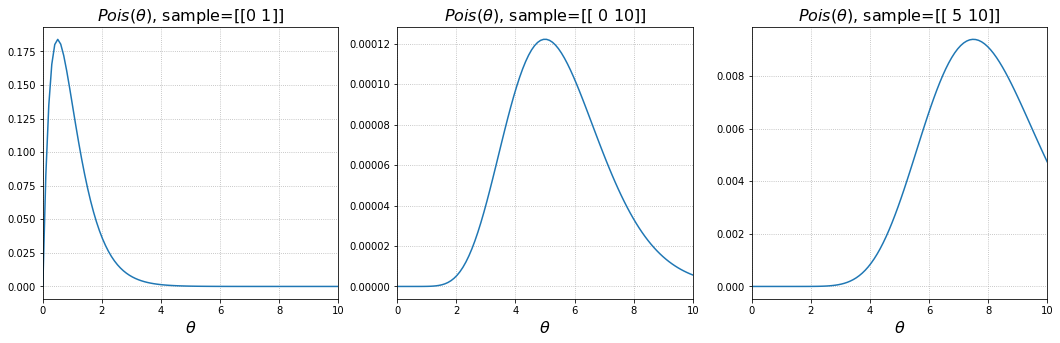

In [54]:
grid = np.linspace(0, 10, 100).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

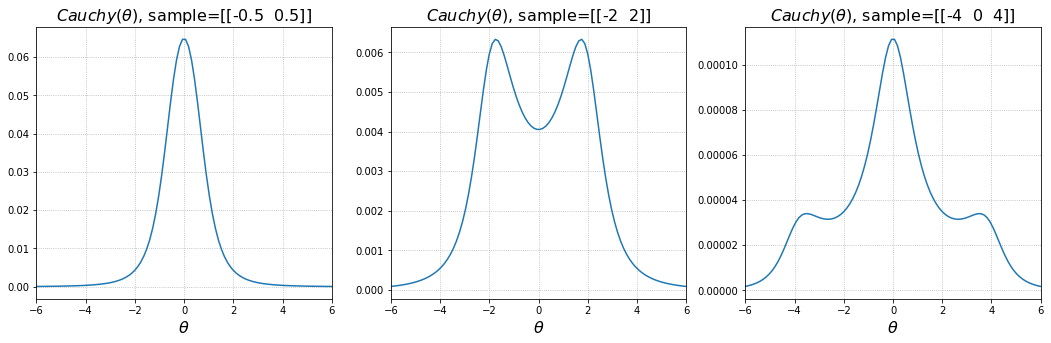

In [55]:
grid = np.linspace(-6, 6, 100).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**
Можно сказать, что при фиксированной выборке, функция правдоподобия это случайная величина от тетты, которая говорит при какам значении параметра, наиболее вероятна зафиксированная выборка. По построенным функциям правдо

*a).* Функция правдоподобия параметрической модели $\mathcal{N}(\theta, 1)$ максимальна при $\theta = \overline{X}$

*b).* Функция правдоподобия параметрической модели $Exp(\theta)$ максимально при $\theta = \frac{1}{\overline{X}}$. Что на самом деле было доказано на семинарах.

*c).* Функция правдоподобия параметрической модели $U[0, \theta]$ максимальна при $\theta = X_{(n)}$. И это тоже можно понять, ведь при меньших значениях плотоность от маскимального элемента выборки зануляется, а при больших начинает убывать со скоростью пропорциональной размеру выборки 

*d).* Функция правдоподобия параметрической модели $Bin(5, \theta)$ имеет оптимальное значение в точке $\frac{\overline{X}}{m}$, где $m$ -- размер выборки.

*e).* Функция правдоподобия параметрической модели $Pois(\theta)$ максимальна при $\theta = \overline{X}$

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, при довольно близких значениях выборки максимальна в их среднем, а при больших имеет несколько экстремумов, так как считает некоторые значения выбросами



Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [56]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы: **

Эта проблема возникает в связи с тем, что размер выборки довольно большой. И выходит, что перемножается $10^5$ чисел, которые не больше, чем $\frac{1}{\sqrt{2\pi}}$. Итого `likelihood` $\le (\frac{1}{2\pi})^{5\cdot10^4}$

Решение видится таким: взять логорифм функции правдоподобия, тогда точки максимума сохранятся, но значение функции не будет стремится к нулю при росте выборки

In [57]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.logpdf(sample).sum()
print(likelihood)

-141884.69550017084


__________________
**Задача 6.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

**Решение:**

Определим общие параметры для двух пунктов задачи и общие функции:

In [58]:
theta_grid = np.arange(0.01, 2.01, 0.01)
k, n = 5000, 100  #  Количество выборок и их размер

def MeanLoss(theta, real_theta, p=1):
    """Считает среднее Функцию риска с функцией потерь L_p"""
    
    return (abs(theta - real_theta) ** p).mean(axis = 1)


def DrowExperiment(X, Estimator, labels, y_lims):
    loss_functions = [r'$\left|x-y\right|$',
                      r'$(x-y)^2$']
    
    for i in range(1, 3):
    #  Цикл по случаю Функции потерь"
    
    
        plt.figure(figsize=(18, 7))
        for j in range(len(labels)):
            #  Цикл по случаю выбора оценки

            theta = Estimator(X, j) 
            Y = MeanLoss(theta, theta_grid[:, np.newaxis], p=i)
            plt.plot(theta_grid, Y, label=labels[j]) 

        plt.grid(ls=':')
        plt.xlabel('$\\theta$', fontsize=16)
        plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta)$', fontsize=16)
        plt.legend(fontsize=14)
        plt.title(r'$L(x, y)=$'+loss_functions[i-1], fontsize=16)
        plt.ylim((0, y_lims[i-1]))
        plt.show()

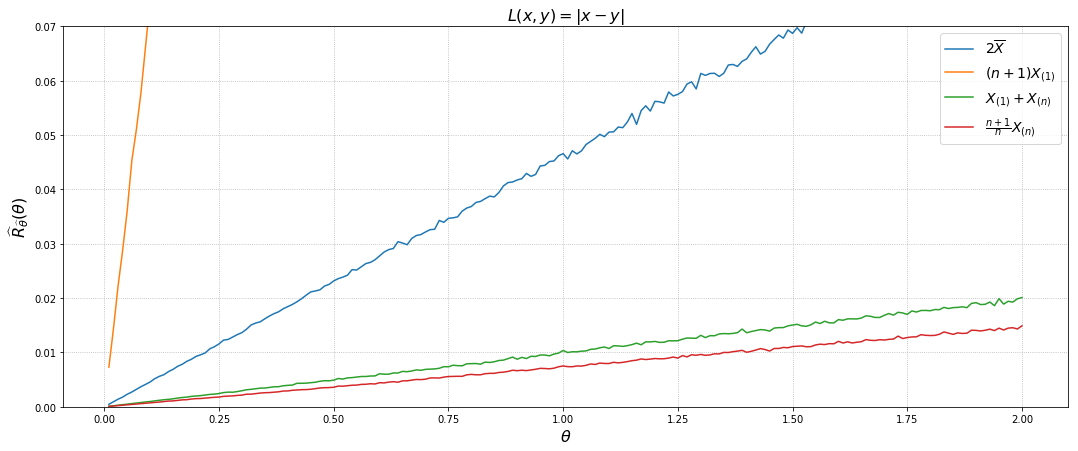

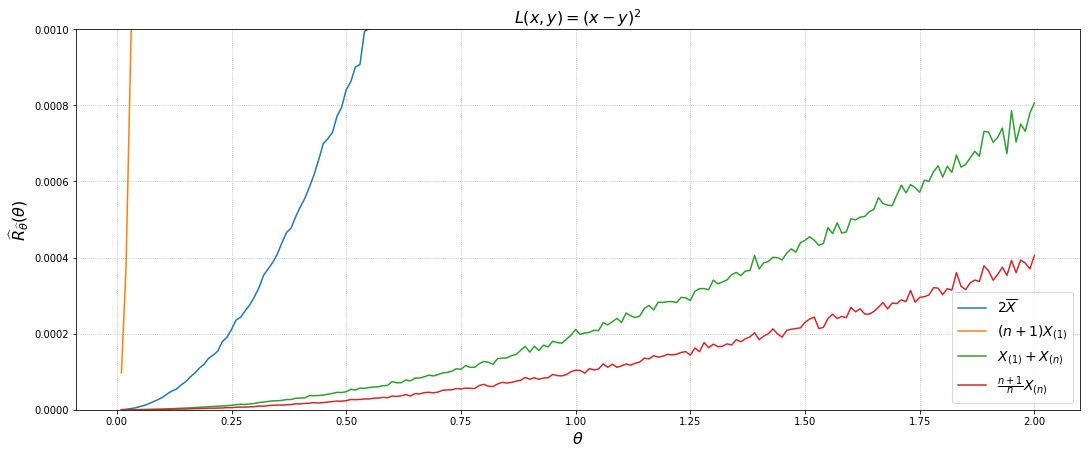

In [59]:
def Theta(X, case):
    """Считает Оценки из условия
    в зависимости от случая (case).
    """
    
    n = X.shape[2]
    if case == 0:
        return 2 * X.mean(axis=2)
    if case == 1:
        return (n + 1) * X.min(axis=2)
    if case == 2:
        return X.min(axis=2) + X.max(axis=2)
    if case == 3:
        return X.max(axis=2) * (n + 1) / n


y_lims = [0.07, 0.001]
labels = [r'$2\overline{X}$',
          r'$(n+1)X_{(1)}$',
          r'$X_{(1)}+X_{(n)}$',
          r'$\frac{n+1}{n} X_{(n)}$']


X = []
for theta in theta_grid:
    X.append(sps.uniform(scale=theta).rvs(size=(k, n))[np.newaxis, :])
X = np.vstack(X)

DrowExperiment(X, Theta, labels, y_lims)

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** Из графиков видно, что с любой функцией потерь оценка $\frac{n+1}{n}X_{(n)}$ лучше прочих.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Рассмотрим оценки $\left(k! \middle/ \overline{X^k} \right)^{1 / k}$ для $1 \leqslant k \leqslant 5$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не дублировать код. Функция факториала реализована как  `scipy.special.factorial`.

**Решение:**

In [60]:
from scipy.special import factorial 

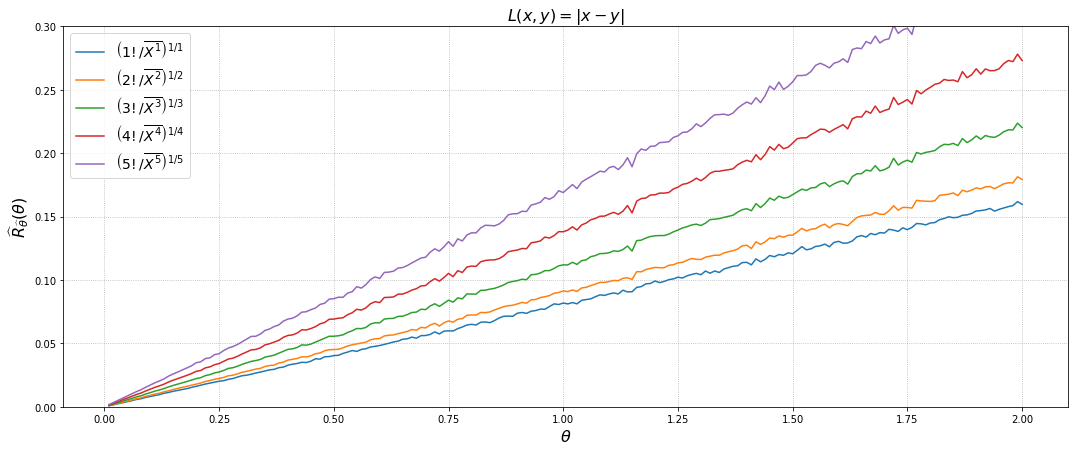

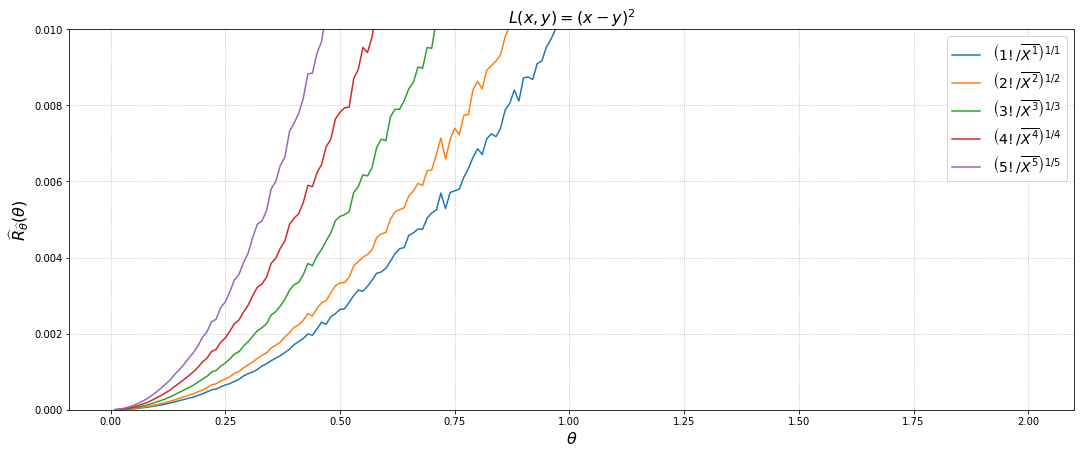

In [61]:

def Theta(X, case):
    """Считает Оценки из условия
    в зависимости от случая (case).
    """
    k = case + 1
    return (factorial(k) /
            (X ** k).mean(axis=2)) ** (1. / k)


y_lims = [0.3, 0.01]
labels = ['$ \\left( {0}! / \\overline {{ X^{0} }} \\right) ^{{1 / {0} }}$'.format(i) for i in range(1, 6)]


X = []
for theta in theta_grid:
    X.append(sps.expon(scale=1/theta).rvs(size=(k, n))[np.newaxis, :])
X = np.vstack(X)

DrowExperiment(X, Theta, labels, y_lims)

**Вывод:** Можно заметить, что как в квадратичном, так и в линейном подходах оценка $\frac{1}{\overline{X}}$ лучше прочих для всех $\theta \in \Theta$. А значит лучше и в прочих(байесовский с равномерным распределением и минимаксный)